In [2]:
import pandas as pd
from pandas.io.json import json_normalize
import numpy as np
from bs4 import BeautifulSoup
import requests
import json
import datetime as dt
from dateutil.relativedelta import relativedelta
import datetime as dt
import time
import warnings
warnings.filterwarnings('ignore')

In [3]:
# 종관(ASOS) 지점 번호
location = [
    (105, '강릉'),
    (101, '춘천'),
    (115, '울릉도'),
    (156, '광주'),
    (143, '대구'),
    (133, '대전'),
    (159, '부산'),
    (108, '서울'),
    (102, '백령도'),
    (146, '전주'),
    (184, '제주'),
    (131, '청주')
]
# location = [(143, '대구')]

In [4]:
df = pd.DataFrame()

In [5]:
url = 'http://apis.data.go.kr/1360000/AsosDalyInfoService/getWthrDataList'
key_en = 'YNeSPpyEp3Ax1Z5oYs5ORHBiZ3Ou51OKW11WzUDMIAn4flasrrYupz8qCvTXVywwMEwHrLZ17ToFV0GVr5iTAg%3D%3D'
key_de = 'YNeSPpyEp3Ax1Z5oYs5ORHBiZ3Ou51OKW11WzUDMIAn4flasrrYupz8qCvTXVywwMEwHrLZ17ToFV0GVr5iTAg=='
start_date = dt.datetime(1980,1,1)
while start_date < dt.datetime(2022,1,1):
    
    Startdt = start_date.strftime('%Y%m%d')
    end_date = start_date + relativedelta(years=1)
    Enddt = end_date.strftime('%Y%m%d')
    start_date = end_date
    for locnum, loc in location:
        print(loc, Startdt,'to',Enddt)
        params ={'serviceKey' : key_de, 'pageNo' : '1', 'numOfRows' : '999', 'dataType' : 'JSON', 'dataCd' : 'ASOS', 'dateCd' : 'DAY', 'startDt' : Startdt, 'endDt' : Enddt, 'stnIds' : locnum }
        try:
            res = requests.get(url, params=params)
            time.sleep(0.1)
            json_object = json.loads(res.text)
        except json.JSONDecodeError:
            start_date = end_date - relativedelta(years=1)
            break
        if json_object['response']['header']['resultCode'] == '00':
            df = pd.concat([df,json_normalize(json_object['response']['body']['items']['item'])])
        break
    break
        

강릉 19800101 to 19810101


In [5]:
df.drop_duplicates(inplace=True)

In [8]:
res.text

'<OpenAPI_ServiceResponse>\n\t<cmmMsgHeader>\n\t\t<errMsg>SERVICE ERROR</errMsg>\n\t\t<returnAuthMsg>HTTP_ERROR</returnAuthMsg>\n\t\t<returnReasonCode>04</returnReasonCode>\n\t</cmmMsgHeader>\n</OpenAPI_ServiceResponse>'

In [7]:
df.apply(lambda col: col.apply(lambda x: np.nan if x == '' else x)).to_csv('기상청ASOS관측.csv')

In [8]:
df = pd.read_csv('기상청ASOS관측.csv',index_col=0)
df

,stnId,stnNm,tm,avgTa,minTa,minTaHrmt,maxTa,maxTaHrmt,mi10MaxRn,mi10MaxRnHrmt,...,avgM05Te,avgM10Te,avgM15Te,avgM30Te,avgM50Te,sumLrgEv,sumSmlEv,n99Rn,iscs,sumFogDur
0,105,강릉,1980-01-01,3.0,-0.4,714,7.0,1549.0,NaN,NaN,...,6.1,9.1,11.4,15.0,15.4,NaN,0.9,2.6,{비}2218-{비}{강도0}2400-,NaN
1,105,강릉,1980-01-02,6.0,3.5,207,8.4,1500.0,NaN,NaN,...,6.7,9.0,11.1,14.8,15.5,NaN,1.5,1.4,-{비}-{비}{강도0}0300-{비}{강도0}0600-{비}{강도0}0900-{비...,NaN
2,105,강릉,1980-01-03,7.5,4.1,1810,12.8,1330.0,NaN,NaN,...,6.8,9.0,11.0,14.8,15.3,NaN,2.2,NaN,NaN,NaN
3,105,강릉,1980-01-04,4.1,-0.8,2356,6.8,1206.0,NaN,NaN,...,7.0,9.1,11.0,14.7,15.5,NaN,1.8,1.5,{비}1406-{싸락눈}1437-{진눈깨비}1450-{진눈깨비}{강도0}1500-{...,NaN
4,105,강릉,1980-01-05,-0.8,-3.9,746,4.3,1224.0,NaN,NaN,...,7.3,9.1,10.8,14.7,15.4,NaN,2.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,131,청주,2021-12-28,-1.4,-4.5,325,1.7,1453.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.4,0.6,NaN,{박무}0010-{박무}{강도0}0300-{박무}{강도1}0600-{박무}{강도2}...,NaN
362,131,청주,2021-12-29,1.8,-3.0,454,7.0,1448.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,1.5,0.0,{박무}0230-{박무}{강도1}0300-{박무}{강도1}0600-{박무}{강도1}...,NaN
363,131,청주,2021-12-30,-1.7,-3.8,2312,1.7,1342.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.1,1.5,0.0,{눈}1445-{눈}{강도0}1500-1655. {눈}2002-2050.,NaN
364,131,청주,2021-12-31,-4.6,-6.2,2340,-0.9,1415.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.3,1.8,NaN,NaN,NaN


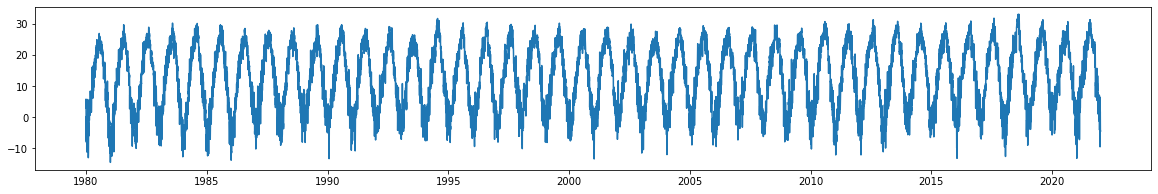

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,3))
df.tm = df.tm.astype('datetime64')
plt.plot(df.query('stnId == 131')[['tm','avgTa']].set_index('tm'))

In [10]:
location
# 대구 바꿔야하고, 백령도도 2000년대 이후로만 데이터가 있음

[(105, '강릉'),
 (101, '춘천'),
 (115, '울릉도'),
 (156, '광주'),
 (143, '대구'),
 (133, '대전'),
 (159, '부산'),
 (108, '서울'),
 (102, '백령도'),
 (146, '전주'),
 (184, '제주'),
 (131, '청주')]